In [3]:
import numpy as np
import pandas as pd

matches_df = pd.read_csv("./processed_data/matches.csv")
rikishi_df = pd.read_csv("./processed_data/rikishi.csv")

df = (
    matches_df.merge(rikishi_df, left_on="westId", right_on="id")
    .merge(rikishi_df, left_on="eastId", right_on="id", suffixes=["_west", "_east"])
    .drop(columns=["id_east", "id_west"])
)

df = df.replace("0001-01-01T00:00:00Z", np.nan)

df["birthDate_east"] = pd.to_datetime(df["birthDate_east"], format="%Y-%m-%dT%H:%M:%SZ")
df["birthDate_west"] = pd.to_datetime(df["birthDate_west"], format="%Y-%m-%dT%H:%M:%SZ")

df
# df[df['birthDate_east'].isna()][["birthDate_east", "bashoId"]]
# df[df['birthDate_west'].isna()][["birthDate_west", "bashoId"]]

,bashoId,division,day,matchNo,eastId,eastRank,westId,westRank,kimarite,winnerId,...,height_west,weight_west,currentRank_west,heya_east,birthDate_east,shusshin_east,debut_east,height_east,weight_east,currentRank_east
0,200003,Makuuchi,9,1,3845,Juryo 1 West,3856,Maegashira 13 West,kotenage,3856,...,177.0,124.0,NaN,Sadogatake,1976-04-11,"Aichi-ken, Okazaki-shi",199903,182.0,154.0,NaN
1,200003,Makuuchi,9,2,3745,Maegashira 11 East,3834,Juryo 1 East,tsukiotoshi,3834,...,175.0,150.5,NaN,Isenoumi,1972-06-16,"Kyoto-fu, Kyoto-shi, Nishikyo-ku",199503,177.0,128.5,NaN
2,200003,Makuuchi,9,3,3743,Maegashira 9 East,3838,Maegashira 12 West,yorikiri,3838,...,188.0,144.0,NaN,Mihogaseki,1970-03-21,"Kumamoto-ken, Uto-shi",199201,178.0,126.0,NaN
3,200003,Makuuchi,9,4,3747,Maegashira 8 East,3836,Maegashira 14 East,oshidashi,3836,...,181.0,139.0,NaN,Takasago,1969-12-11,"Aichi-ken, Ichinomiya-shi",199203,176.0,142.3,NaN
4,200003,Makuuchi,9,5,3860,Maegashira 7 East,794,Maegashira 12 East,oshitaoshi,794,...,185.0,116.0,NaN,Tokitsukaze,1973-11-08,"Nagasaki-ken, Fukue-shi",199603,184.0,134.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718836,200711,Makuuchi,7,16,3181,Maegashira 3 East,3858,Ozeki 1 West,tsukidashi,3858,...,181.5,158.0,NaN,Michinoku,1985-08-10,"Mongolia, Ulan-Bator - Mongolia, Sükhbaatar",200111,186.0,150.0,NaN
718837,200711,Makuuchi,7,17,3845,Ozeki 1 East,3835,Maegashira 4 West,yorikiri,3845,...,190.5,144.5,NaN,Sadogatake,1976-04-11,"Aichi-ken, Okazaki-shi",199903,182.0,154.0,NaN
718838,200711,Makuuchi,7,18,3398,Sekiwake 1 West,4071,Ozeki 2 West,yorikiri,4071,...,185.0,175.0,NaN,Takasago,1981-08-07,"Mongolia, Ulan-Bator",200001,184.5,136.0,NaN
718839,200711,Makuuchi,7,19,4226,Ozeki 2 East,3247,Sekiwake 1 East,fusen,3247,...,185.0,136.0,NaN,Sadogatake,1983-02-19,"Bulgaria, Veliko Tarnovo",200211,202.0,140.0,NaN


In [4]:
basho_date = (
    df["bashoId"].astype("str").str[:4]
    + "-"
    + df["bashoId"].astype("str").str[4:]
    + "-"
    + df["day"].astype("str")
)
basho_date = pd.to_datetime(basho_date, format="%Y-%m-%d")
df.insert(loc=1, value=basho_date, column="basho_date")

basho_year_month = (
    df["bashoId"].astype("str").str[:4] + "-" + df["bashoId"].astype("str").str[4:]
)
basho_year_month = pd.to_datetime(basho_year_month, format="%Y-%m")
df.insert(loc=1, value=basho_year_month, column="basho_year_month")
df

,bashoId,basho_year_month,basho_date,division,day,matchNo,eastId,eastRank,westId,westRank,...,height_west,weight_west,currentRank_west,heya_east,birthDate_east,shusshin_east,debut_east,height_east,weight_east,currentRank_east
0,200003,2000-03-01,2000-03-09,Makuuchi,9,1,3845,Juryo 1 West,3856,Maegashira 13 West,...,177.0,124.0,NaN,Sadogatake,1976-04-11,"Aichi-ken, Okazaki-shi",199903,182.0,154.0,NaN
1,200003,2000-03-01,2000-03-09,Makuuchi,9,2,3745,Maegashira 11 East,3834,Juryo 1 East,...,175.0,150.5,NaN,Isenoumi,1972-06-16,"Kyoto-fu, Kyoto-shi, Nishikyo-ku",199503,177.0,128.5,NaN
2,200003,2000-03-01,2000-03-09,Makuuchi,9,3,3743,Maegashira 9 East,3838,Maegashira 12 West,...,188.0,144.0,NaN,Mihogaseki,1970-03-21,"Kumamoto-ken, Uto-shi",199201,178.0,126.0,NaN
3,200003,2000-03-01,2000-03-09,Makuuchi,9,4,3747,Maegashira 8 East,3836,Maegashira 14 East,...,181.0,139.0,NaN,Takasago,1969-12-11,"Aichi-ken, Ichinomiya-shi",199203,176.0,142.3,NaN
4,200003,2000-03-01,2000-03-09,Makuuchi,9,5,3860,Maegashira 7 East,794,Maegashira 12 East,...,185.0,116.0,NaN,Tokitsukaze,1973-11-08,"Nagasaki-ken, Fukue-shi",199603,184.0,134.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718836,200711,2007-11-01,2007-11-07,Makuuchi,7,16,3181,Maegashira 3 East,3858,Ozeki 1 West,...,181.5,158.0,NaN,Michinoku,1985-08-10,"Mongolia, Ulan-Bator - Mongolia, Sükhbaatar",200111,186.0,150.0,NaN
718837,200711,2007-11-01,2007-11-07,Makuuchi,7,17,3845,Ozeki 1 East,3835,Maegashira 4 West,...,190.5,144.5,NaN,Sadogatake,1976-04-11,"Aichi-ken, Okazaki-shi",199903,182.0,154.0,NaN
718838,200711,2007-11-01,2007-11-07,Makuuchi,7,18,3398,Sekiwake 1 West,4071,Ozeki 2 West,...,185.0,175.0,NaN,Takasago,1981-08-07,"Mongolia, Ulan-Bator",200001,184.5,136.0,NaN
718839,200711,2007-11-01,2007-11-07,Makuuchi,7,19,4226,Ozeki 2 East,3247,Sekiwake 1 East,...,185.0,136.0,NaN,Sadogatake,1983-02-19,"Bulgaria, Veliko Tarnovo",200211,202.0,140.0,NaN


In [5]:
age_east = round(
    (df["basho_date"] - df["birthDate_east"]) / pd.Timedelta(days=365.25), 1
)
age_west = round(
    (df["basho_date"] - df["birthDate_west"]) / pd.Timedelta(days=365.25), 1
)

df.insert(loc=20, value=age_east, column="age_east")
df.insert(loc=13, value=age_west, column="age_west")

df

,bashoId,basho_year_month,basho_date,division,day,matchNo,eastId,eastRank,westId,westRank,...,weight_west,currentRank_west,heya_east,age_east,birthDate_east,shusshin_east,debut_east,height_east,weight_east,currentRank_east
0,200003,2000-03-01,2000-03-09,Makuuchi,9,1,3845,Juryo 1 West,3856,Maegashira 13 West,...,124.0,NaN,Sadogatake,23.9,1976-04-11,"Aichi-ken, Okazaki-shi",199903,182.0,154.0,NaN
1,200003,2000-03-01,2000-03-09,Makuuchi,9,2,3745,Maegashira 11 East,3834,Juryo 1 East,...,150.5,NaN,Isenoumi,27.7,1972-06-16,"Kyoto-fu, Kyoto-shi, Nishikyo-ku",199503,177.0,128.5,NaN
2,200003,2000-03-01,2000-03-09,Makuuchi,9,3,3743,Maegashira 9 East,3838,Maegashira 12 West,...,144.0,NaN,Mihogaseki,30.0,1970-03-21,"Kumamoto-ken, Uto-shi",199201,178.0,126.0,NaN
3,200003,2000-03-01,2000-03-09,Makuuchi,9,4,3747,Maegashira 8 East,3836,Maegashira 14 East,...,139.0,NaN,Takasago,30.2,1969-12-11,"Aichi-ken, Ichinomiya-shi",199203,176.0,142.3,NaN
4,200003,2000-03-01,2000-03-09,Makuuchi,9,5,3860,Maegashira 7 East,794,Maegashira 12 East,...,116.0,NaN,Tokitsukaze,26.3,1973-11-08,"Nagasaki-ken, Fukue-shi",199603,184.0,134.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718836,200711,2007-11-01,2007-11-07,Makuuchi,7,16,3181,Maegashira 3 East,3858,Ozeki 1 West,...,158.0,NaN,Michinoku,22.2,1985-08-10,"Mongolia, Ulan-Bator - Mongolia, Sükhbaatar",200111,186.0,150.0,NaN
718837,200711,2007-11-01,2007-11-07,Makuuchi,7,17,3845,Ozeki 1 East,3835,Maegashira 4 West,...,144.5,NaN,Sadogatake,31.6,1976-04-11,"Aichi-ken, Okazaki-shi",199903,182.0,154.0,NaN
718838,200711,2007-11-01,2007-11-07,Makuuchi,7,18,3398,Sekiwake 1 West,4071,Ozeki 2 West,...,175.0,NaN,Takasago,26.3,1981-08-07,"Mongolia, Ulan-Bator",200001,184.5,136.0,NaN
718839,200711,2007-11-01,2007-11-07,Makuuchi,7,19,4226,Ozeki 2 East,3247,Sekiwake 1 East,...,136.0,NaN,Sadogatake,24.7,1983-02-19,"Bulgaria, Veliko Tarnovo",200211,202.0,140.0,NaN


In [8]:
dfcopy = df.copy()

In [9]:
from matplotlib import pyplot as plt

dfcopy

,bashoId,basho_year_month,basho_date,division,day,matchNo,eastId,eastRank,westId,westRank,...,weight_west,currentRank_west,heya_east,age_east,birthDate_east,shusshin_east,debut_east,height_east,weight_east,currentRank_east
0,200003,2000-03-01,2000-03-09,Makuuchi,9,1,3845,Juryo 1 West,3856,Maegashira 13 West,...,124.0,NaN,Sadogatake,23.9,1976-04-11,"Aichi-ken, Okazaki-shi",199903,182.0,154.0,NaN
1,200003,2000-03-01,2000-03-09,Makuuchi,9,2,3745,Maegashira 11 East,3834,Juryo 1 East,...,150.5,NaN,Isenoumi,27.7,1972-06-16,"Kyoto-fu, Kyoto-shi, Nishikyo-ku",199503,177.0,128.5,NaN
2,200003,2000-03-01,2000-03-09,Makuuchi,9,3,3743,Maegashira 9 East,3838,Maegashira 12 West,...,144.0,NaN,Mihogaseki,30.0,1970-03-21,"Kumamoto-ken, Uto-shi",199201,178.0,126.0,NaN
3,200003,2000-03-01,2000-03-09,Makuuchi,9,4,3747,Maegashira 8 East,3836,Maegashira 14 East,...,139.0,NaN,Takasago,30.2,1969-12-11,"Aichi-ken, Ichinomiya-shi",199203,176.0,142.3,NaN
4,200003,2000-03-01,2000-03-09,Makuuchi,9,5,3860,Maegashira 7 East,794,Maegashira 12 East,...,116.0,NaN,Tokitsukaze,26.3,1973-11-08,"Nagasaki-ken, Fukue-shi",199603,184.0,134.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718836,200711,2007-11-01,2007-11-07,Makuuchi,7,16,3181,Maegashira 3 East,3858,Ozeki 1 West,...,158.0,NaN,Michinoku,22.2,1985-08-10,"Mongolia, Ulan-Bator - Mongolia, Sükhbaatar",200111,186.0,150.0,NaN
718837,200711,2007-11-01,2007-11-07,Makuuchi,7,17,3845,Ozeki 1 East,3835,Maegashira 4 West,...,144.5,NaN,Sadogatake,31.6,1976-04-11,"Aichi-ken, Okazaki-shi",199903,182.0,154.0,NaN
718838,200711,2007-11-01,2007-11-07,Makuuchi,7,18,3398,Sekiwake 1 West,4071,Ozeki 2 West,...,175.0,NaN,Takasago,26.3,1981-08-07,"Mongolia, Ulan-Bator",200001,184.5,136.0,NaN
718839,200711,2007-11-01,2007-11-07,Makuuchi,7,19,4226,Ozeki 2 East,3247,Sekiwake 1 East,...,136.0,NaN,Sadogatake,24.7,1983-02-19,"Bulgaria, Veliko Tarnovo",200211,202.0,140.0,NaN


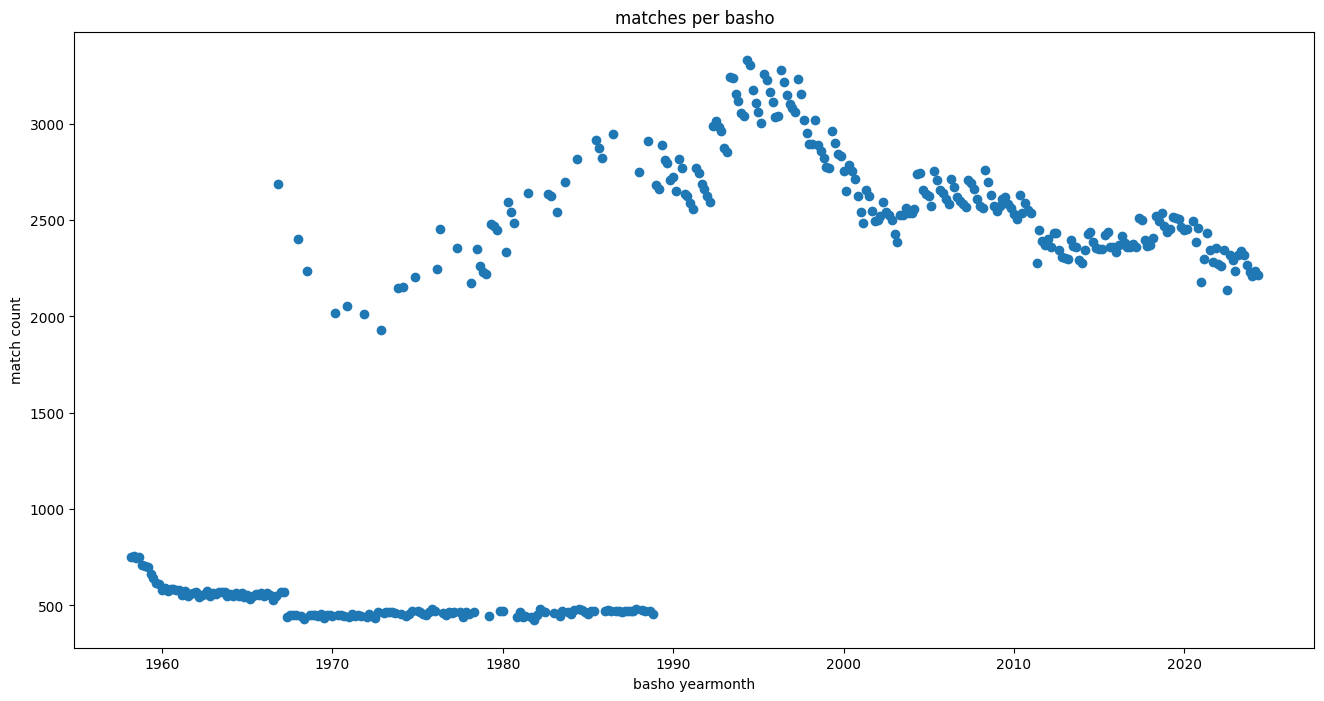

In [10]:
grouped = dfcopy.groupby("basho_year_month").size()

fig, ax = plt.subplots()

fig.set_figheight(8)
fig.set_figwidth(16)
scatter = ax.scatter(grouped.index, grouped.values)
plt.xlabel("basho yearmonth")
plt.ylabel("match count")
plt.title("matches per basho")

plt.show()

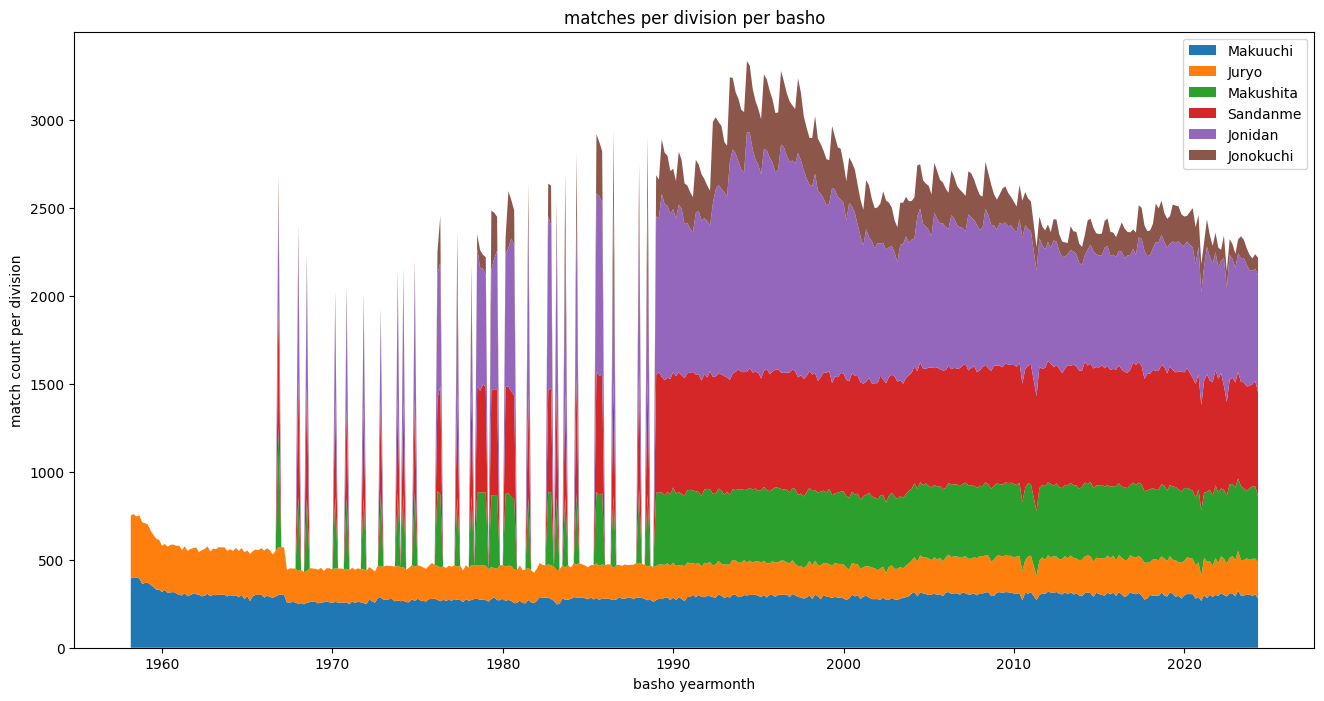

In [11]:
divisions = ["Makuuchi", "Juryo", "Makushita", "Sandanme", "Jonidan", "Jonokuchi"]
colors = ["violet", "indigo", "blue", "green", "orange", "red"]

grouped = dfcopy.groupby(["basho_year_month", "division"]).size()

grouped = grouped.reset_index()
grouped = grouped.set_index("basho_year_month")
grouped = grouped.rename(columns={0: "matches_per_division"})
grouped = grouped.pivot_table(
    values="matches_per_division",
    index=grouped.index,
    columns="division",
    aggfunc="first",
)
grouped = grouped.fillna(0)

fig, ax = plt.subplots()

fig.set_figheight(8)
fig.set_figwidth(16)

ax.stackplot(grouped.index, [grouped[i] for i in divisions])

plt.legend(divisions)
plt.xlabel("basho yearmonth")
plt.ylabel("match count per division")
plt.title("matches per division per basho (of total)")

plt.show()

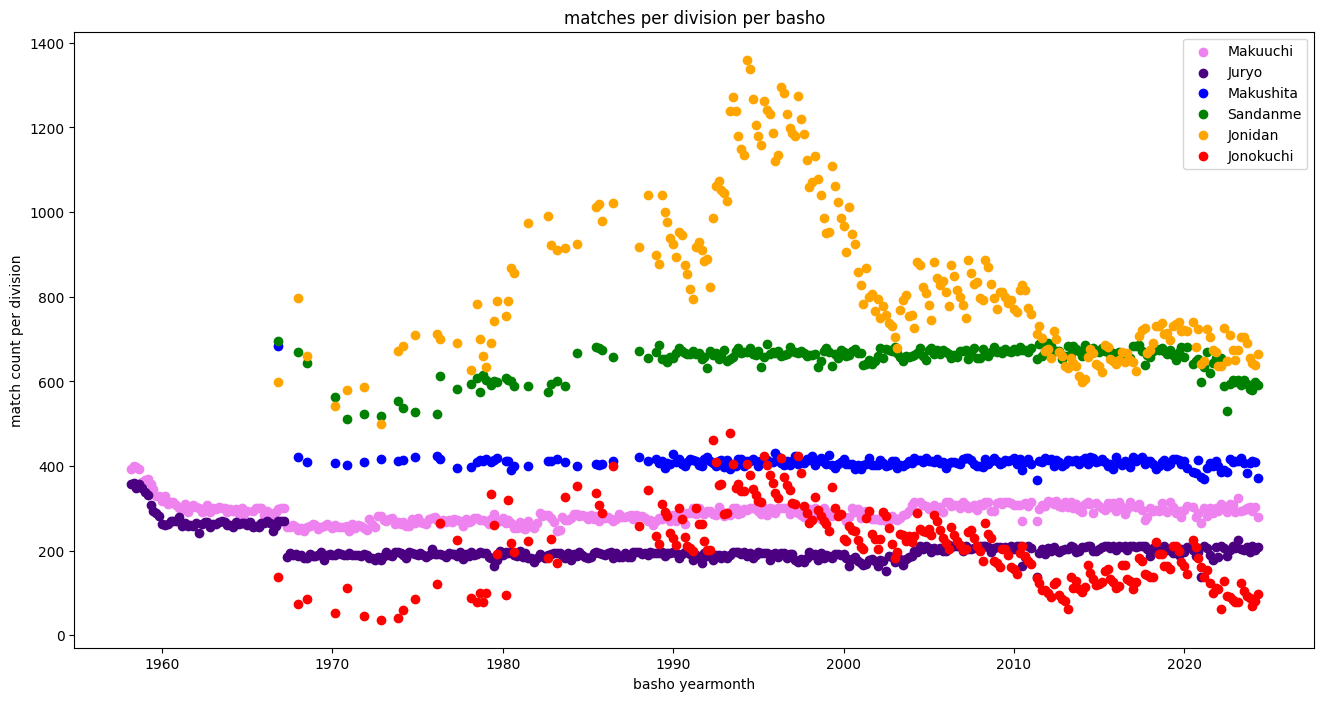

In [25]:
divisions = ["Makuuchi", "Juryo", "Makushita", "Sandanme", "Jonidan", "Jonokuchi"]
colors = ["violet", "indigo", "blue", "green", "orange", "red"]

grouped = dfcopy.groupby(["basho_year_month", "division"]).size()

grouped = grouped.reset_index()
grouped = grouped.set_index("basho_year_month")
grouped = grouped.rename(columns={0: "matches_per_division"})

fig, ax = plt.subplots()

fig.set_figheight(8)
fig.set_figwidth(16)

for division, color in zip(divisions, colors):
    matches_per_current_division = grouped[grouped["division"] == division]
    ax.scatter(
        matches_per_current_division.index,
        matches_per_current_division["matches_per_division"],
        c=color,
    )

plt.legend(divisions)
plt.xlabel("basho yearmonth")
plt.ylabel("match count per division")
plt.title("matches per division per basho (raw)")

plt.show()